## WEEK 2 DELIVERABLES
### Step 1: Importing the dataset and the necessary libraries
In this step, we import the necessary Python libraries needed for data handling, visualization, and machine learning preprocessing.


In [4]:

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 2. Load the data
df = pd.read_csv('SyntheticData_Training.csv')
df.head()


,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,cookloc_adm,lightfuel_adm,tobacco_adm,bednet_adm,hctpretransfusion_adm,hivstatus_adm,malariastatuspos_adm,lengthadm,caregiver_adm_new,inhospital_mortality
0,1,16.8,79.8,11.6,150.0,130.0,23.0,92.0,54.0,36.3,...,In a separate building/building space used as ...,Electric bulbs (national grid),Never,Always,Yes,HIV negative,No,2,Mother,0
1,2,46.1,93.0,13.6,151.0,115.0,35.0,72.0,42.0,36.8,...,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,Yes,5,Mother,0
2,3,7.9,68.2,8.2,148.0,150.0,56.0,94.0,51.0,37.2,...,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,No,4,Mother,0
3,4,38.2,95.0,12.0,138.0,134.0,38.0,94.0,57.0,37.6,...,In the house where you sleep,Electric bulbs (national grid),Never,Always,NaN,HIV negative,Yes,5,Mother,0
4,5,16.1,83.0,12.0,165.0,163.0,61.0,107.0,73.0,38.7,...,Outdoors in the open,Electric bulbs (national grid),Never,Sometimes,Yes,HIV negative,Yes,7,Mother,0


### Step 2: Dropping some features
#### (a) Dropping the forbidden features 

In [5]:

# List of forbidden intervention features
forbidden_features = [
    'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4',
    'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8',
    'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12',
    'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16',
    'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20',
    'admitabx_adm___21'
]

# Drop forbidden features + studyid_adm (study ID column)
df = df.drop(columns=forbidden_features + ['studyid_adm'])

# Check new shape
print(f"Shape after dropping forbidden features: {df.shape}")


Shape after dropping forbidden features: (2686, 116)


#### (b) Further dropping of non-informative, extremely sparse, or variables that can lead to leakage risks. 

We are keen to be left with data that represent what was known at admission only. As such, the following variables are dropped further: **lengthadm, spo2other_adm, lactate2_mmolpl_adm, nonexclbreastfed_adm, symptoms_adm___18,vaccmeaslessource_adm, vaccpneumocsource_adm, vaccdptsource_adm, duedateknown_adm**

##### Why We Use Only Data Available at Admission

When developing our predictive model, we restrict ourselves to data collected up to the time of hospital admission. 
This is intentional and critically important for several reasons:

- **Real-World Decision Making:** 
  - Clinicians must predict patient outcomes at admission to guide urgent care decisions.
  - Early prediction is crucial to intervene before deterioration occurs.

- **Avoiding Data Leakage:**
  - Using information collected after admission would introduce future knowledge into the model.
  - This would create unfair, unrealistic models with artificially high performance.

- **Ethical and Operational Standards:**
  - Clinical models must be built using only information that would be available at the time decisions are made.
  - Using post-admission data would mislead real-world application and patient care.

- **Focus on Early Intervention:**
  - Sepsis progresses rapidly; early risk identification is key to improving patient outcomes.
  - We need to predict mortality risk **before** major clinical events occur, not after.

By adhering to these principles, we ensure that our model is clinically useful, ethically sound, scientifically valid, and compliant with the competition standards.


In [6]:
drop_vars = [
    'lengthadm', 
    'spo2other_adm', 
    'lactate2_mmolpl_adm', 
    'nonexclbreastfed_adm', 
    'symptoms_adm___18',
    'vaccmeaslessource_adm', 
    'vaccpneumocsource_adm', 
    'vaccdptsource_adm', 
    'duedateknown_adm'
]

df = df.drop(columns=drop_vars)

# Confirm new shape
print("Shape after further cleaning:", df.shape)


Shape after further cleaning: (2686, 107)


### Step 3: Summarize cohort 
Before proceeding with modeling, it is essential to summarize the characteristics of the patient cohort. 

This summary serves several important purposes:
- It helps understand the basic structure of the dataset, including the number of patients, features, and the distribution of outcomes.
- It provides an early opportunity to catch any major data quality issues (e.g., unexpected missingness or unbalanced outcomes).
- It establishes a baseline for later comparisons, ensuring that model predictions align with the real-world data distribution.
- It is a critical requirement for scientific reporting, where cohort summaries are typically included as standard practice.
- It acts as a sanity check, allowing us to build trust in the dataset before advancing to modeling and analysis.

Therefore, summarizing the cohort is a necessary and efficient step in preparing for robust and meaningful predictive modeling.


In [7]:
# Total patients
print(f"Total patients: {df.shape[0]}")

# Features left after cleaning
print(f"Total features: {df.shape[1]}")

# Outcome distribution
print("\nMortality Distribution (0 = survived, 1 = died):")
print(df['inhospital_mortality'].value_counts())

# Quick look at general statistics for numeric variables
df.describe()


Total patients: 2686
Total features: 107

Mortality Distribution (0 = survived, 1 = died):
inhospital_mortality
0    2567
1     119
Name: count, dtype: int64


,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,spo2site1_pc_oxi_adm,...,momagefirstpreg_adm,householdsize_adm,alivechildren_adm,deadchildren_adm,hematocrit_gpdl_adm,lactate_mmolpl_adm,glucose_mmolpl_adm,sqi1_perc_oxi_adm,sqi2_perc_oxi_adm,inhospital_mortality
count,2686.00000,2672.000000,2677.000000,2673.000000,2685.000000,2681.000000,2684.000000,2685.000000,2685.000000,2682.000000,...,2462.000000,2683.000000,2682.00000,2685.000000,2229.000000,2222.000000,2677.000000,2556.000000,2479.000000,2686.000000
mean,21.12338,79.659401,9.577265,138.076693,141.219367,46.179784,96.941133,54.594041,37.470503,94.750186,...,19.245329,5.142751,3.02349,0.354935,32.954240,2.774887,6.320882,88.780516,78.004841,0.044304
std,13.05725,11.110075,2.796121,15.934621,25.550612,14.871732,11.876974,11.005274,1.007606,6.389585,...,3.386628,2.132131,1.81805,0.810868,9.750002,2.123403,2.512912,16.714758,23.383975,0.205808
min,5.90000,56.000000,2.610000,75.000000,42.000000,17.000000,58.000000,15.000000,33.600000,57.000000,...,12.000000,2.000000,0.00000,0.000000,6.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,10.52500,71.500000,7.640000,130.000000,128.000000,35.000000,89.000000,48.000000,36.700000,93.000000,...,17.000000,4.000000,2.00000,0.000000,28.000000,1.500000,5.000000,87.000000,68.000000,0.000000
50%,16.90000,78.000000,9.000000,140.000000,143.000000,44.000000,96.000000,54.000000,37.200000,97.000000,...,19.000000,5.000000,3.00000,0.000000,34.000000,2.100000,6.000000,96.000000,87.000000,0.000000
75%,28.67500,86.700000,11.000000,149.000000,158.000000,56.000000,104.000000,62.000000,38.200000,99.000000,...,21.000000,6.000000,4.00000,0.000000,40.000000,3.300000,7.200000,99.000000,96.000000,0.000000
max,61.80000,122.000000,22.000000,190.000000,214.000000,116.000000,159.000000,103.000000,40.600000,100.000000,...,36.000000,19.000000,11.00000,9.000000,82.000000,18.900000,24.200000,99.000000,99.000000,1.000000


The dataset contains a total of **2,686 pediatric patients** across **107 features** after initial cleaning and dropping irrelevant variables.

#### Mortality Distribution:
- **2,567 patients (95.6%) survived** during hospitalization.
- **119 patients (4.4%) died** during hospitalization.

This highlights a strong **class imbalance** where the majority of the patients survived. 
It suggests that modeling will require careful handling of imbalance, such as using balanced class weights or specialized evaluation metrics.


### Step 4: Analyze Missing Values
Identifying and understanding missing data is a critical step before building predictive models. 

This step serves several important purposes:
- **Maintaining dataset completeness:** Most machine learning algorithms cannot handle missing values directly. Knowing where missingness occurs allows us to plan appropriate imputation strategies.
- **Preventing bias:** Missing data can introduce biases if certain features or groups are systematically incomplete. Detecting patterns of missingness early helps mitigate this risk.
- **Prioritizing feature treatment:** Some features may have minor missingness and can be easily imputed, while others may have extensive missingness requiring careful handling or even removal.
- **Informing modeling decisions:** The amount and pattern of missing data can influence which algorithms and preprocessing techniques are appropriate.

Therefore, systematically analyzing missing values ensures we create a robust, fair, and high-performing predictive model.



In [8]:
# Find the number of missing values per feature
missing_values = df.isnull().sum()

# Only keep features that actually have missing values
missing_values = missing_values[missing_values > 0]

# Sort features by number of missing values in descending order
missing_values = missing_values.sort_values(ascending=False)

# Display how many features have missing values
print(f"Number of features with missing values: {len(missing_values)}")

# Display the missing values
missing_values


Number of features with missing values: 51


lactate_mmolpl_adm          464
hematocrit_gpdl_adm         457
momagefirstpreg_adm         224
sqi2_perc_oxi_adm           207
spo2site2_pc_oxi_adm        205
sqi1_perc_oxi_adm           130
hctpretransfusion_adm        43
birthattend_adm              30
momageknown_adm              22
momage_adm                   19
height_cm_adm                14
muac_mm_adm                  13
weight_kg_adm                 9
glucose_mmolpl_adm            9
momhiv_adm                    6
hivstatus_adm                 5
priorhosp_adm                 5
rr_brpm_app_adm               5
spo2site1_pc_oxi_adm          4
badhealthduration_adm         4
spo2onoxy_adm                 4
alivechildren_adm             4
caregiver_adm_new             3
bednet_adm                    3
householdsize_adm             3
lightfuel_adm                 3
sysbp_mmhg_adm                2
caregiverage_adm              2
cookloc_adm                   2
waterpure_adm                 2
watersource_adm               2
vaccdpt_

- A total of **51 features** have missing values.
- The majority of features have **very low missingness** (1–6 missing entries), which is manageable with simple imputation.
- A few features have **substantial missingness**:
  - `lactate_mmolpl_adm` (~464 missing)
  - `hematocrit_gpdl_adm` (~457 missing)
  - `momagefirstpreg_adm` (~224 missing)
  - `sqi2_perc_oxi_adm`, `spo2site2_pc_oxi_adm`, `sqii_perc_oxi_adm` (all oxygen saturation quality indicators with 130–207 missing)

- Features like `hctpretransfusion_adm`, `birthattend_adm`, and `momageknown_adm` have moderate missingness (20–30 entries missing).
- **Critical clinical measures** (e.g., heart rate, respiratory rate, systolic/diastolic BP, temperature) have **very minimal missingness** (only 1–5 missing), indicating strong dataset reliability for vital signs.

#### Implication:
- **Simple imputation** (median for continuous, mode for categorical) will be sufficient for most features.
- Features with large missingness (>15%) will require careful attention during imputation, but do not necessarily need to be dropped due to their likely clinical significance.



### Step 5: Missing values imputation
After analyzing missing values, it is necessary to apply data imputation strategies to ensure dataset completeness for modeling. 

Handling missing values carefully is important because:
- Most machine learning models cannot accept missing data directly.
- Poor imputation can introduce bias or reduce model performance.
- Proper imputation maintains the clinical integrity of the features.

We categorize our imputation approach based on the level of missingness observed:

- **Highly Missing Features (more than 15% missing):**
  - Features like `lactate_mmolpl_adm` and `hematocrit_gpdl_adm`.
  - These will be imputed using the **median** for continuous variables to reduce the impact of extreme values, while preserving the central tendency of the feature.

- **Moderately Missing Features (5% to 15% missing):**
  - Features like `momagefirstpreg_adm`, `sqi2_perc_oxi_adm`, `spo2site2_pc_oxi_adm`.
  - These will also be imputed using **median** for continuous variables or **mode** for categorical variables based on feature type.

- **Negligibly Missing Features (less than 5% missing):**
  - The majority of features fall here.
  - These will be imputed using **simple median or mode imputation** depending on whether the variable is continuous or categorical.

This systematic imputation strategy ensures that the dataset remains statistically sound while minimizing potential biases introduced during data cleaning.


In [9]:
from sklearn.impute import SimpleImputer

# 1. Identify continuous (numeric) and categorical features
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
continuous_features.remove('inhospital_mortality')  # Exclude the target variable

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Create imputers
median_imputer = SimpleImputer(strategy='median')  # For continuous variables
mode_imputer = SimpleImputer(strategy='most_frequent')  # For categorical variables

# 3. Impute continuous features
df[continuous_features] = median_imputer.fit_transform(df[continuous_features])

# 4. Impute categorical features
df[categorical_features] = mode_imputer.fit_transform(df[categorical_features])

# 5. Quick check if there are still missing values
print("Remaining missing values after imputation:", df.isnull().sum().sum())


Remaining missing values after imputation: 0


#### What our imputation code does: 

| Step | Action |
|:---|:---|
| **1** | Separates continuous (numeric) features and categorical features. |
| **2** | Creates two imputers: median imputer for continuous features and mode imputer for categorical features. |
| **3** | Applies the median imputer to continuous features and the mode imputer to categorical features. |
| **4** | Confirms that all missing values have been handled by printing the total number of missing entries remaining. |

We have successfully done our imputation as evidenced by the 0 missing values output. 

#### Why We Chose Median and Mode for Imputation

We chose **Median Imputation** for continuous variables and **Mode Imputation** for categorical variables, instead of using advanced methods like KNN, MICE, or XGBoost.

**Reasons for this choice:**
- **Simplicity and Speed:** Median and mode imputation are fast to apply and easy to interpret, making them suitable for our initial data cleaning stage.
- **Robustness to Outliers:** Median is less sensitive to extreme values, which is important given the presence of outliers in clinical data.
- **Low Risk of Overfitting:** Advanced imputation methods like KNN, MICE, and model-based imputations (e.g., XGBoost) can introduce unnecessary complexity or bias if not carefully tuned.
- **Focus on Early Modeling:** At this stage, our goal is to prepare a clean and usable dataset quickly for baseline model development. More sophisticated methods can be explored later if necessary.

**Why We Handled Continuous and Categorical Variables Separately:**
- **Different Data Types:** Continuous features are numerical and need statistical imputation like median, while categorical features represent labels and require mode or classification-based imputation.
- **Preserve Data Integrity:** Treating categories as numbers would distort the meaning of the data, and treating numbers as categories would lose important variance.
- **Best Practice:** Handling continuous and categorical features separately ensures more accurate, meaningful imputations and supports better model performance later.

By using median and mode, and treating feature types separately, we ensured a practical, reliable, and efficient imputation approach that maintains the clinical and statistical integrity of the dataset while supporting rapid progress toward predictive modeling.




### Step 6: Visualization of a few selected continuous variables 

In this section, we focus on visualizing a selected subset of key clinical features from the dataset. 
Given the large number of features available, we have chosen to visualize only a few critical variables that are most relevant to the clinical understanding of sepsis and mortality.

The selected features are:
- `hr_bpm_adm` (Heart rate at admission)
- `rr_brpm_app_adm` (Respiratory rate at admission)
- `temp_c_adm` (Body temperature at admission)
- `sysbp_mmhg_adm` (Systolic blood pressure at admission)
- `diasbp_mmhg_adm` (Diastolic blood pressure at admission)
- `spo2site1_pc_oxi_adm` (Oxygen saturation at admission)

**Justification for Selection:**
- These features are **clinically significant** indicators of sepsis severity, organ dysfunction, and potential mortality risk.
- They are **continuous numeric variables**, making them suitable for visualization using histograms and boxplots.
- They have **minimal missing data** after imputation, ensuring reliability in the patterns observed.
- They are expected to show **meaningful differences** between survivors and non-survivors, helping to inform later predictive modeling.

**Note on Categorical Variables:**
- At this stage, we are not visualizing categorical variables such as sex or symptom checkboxes.
- Categorical variables are better explored using count plots or bar charts, which are more appropriate for discrete data.
- Their visualization will be handled separately during feature engineering or later exploratory steps when categorical relationships with mortality are specifically analyzed.

By focusing on continuous vital signs and physiological measures first, we aim to capture essential trends that are critical for early understanding of sepsis outcomes.


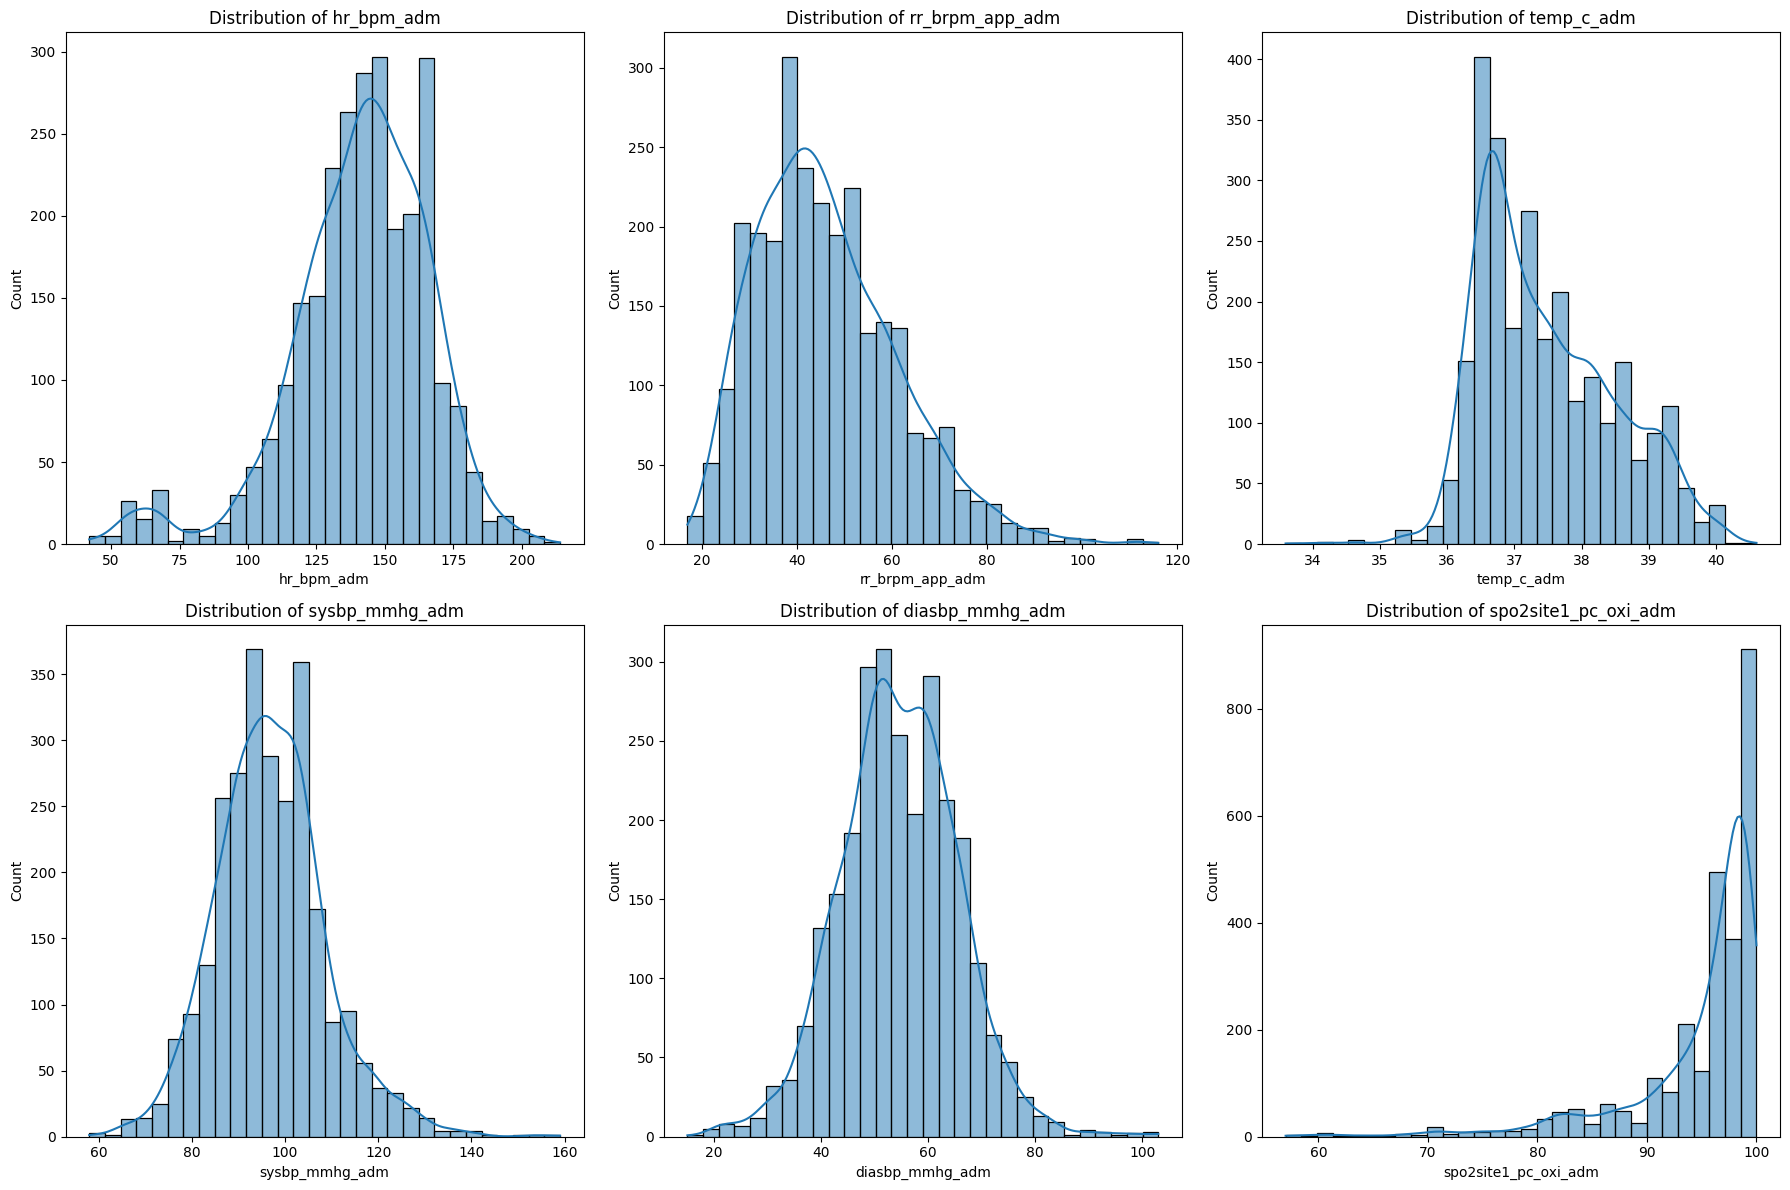

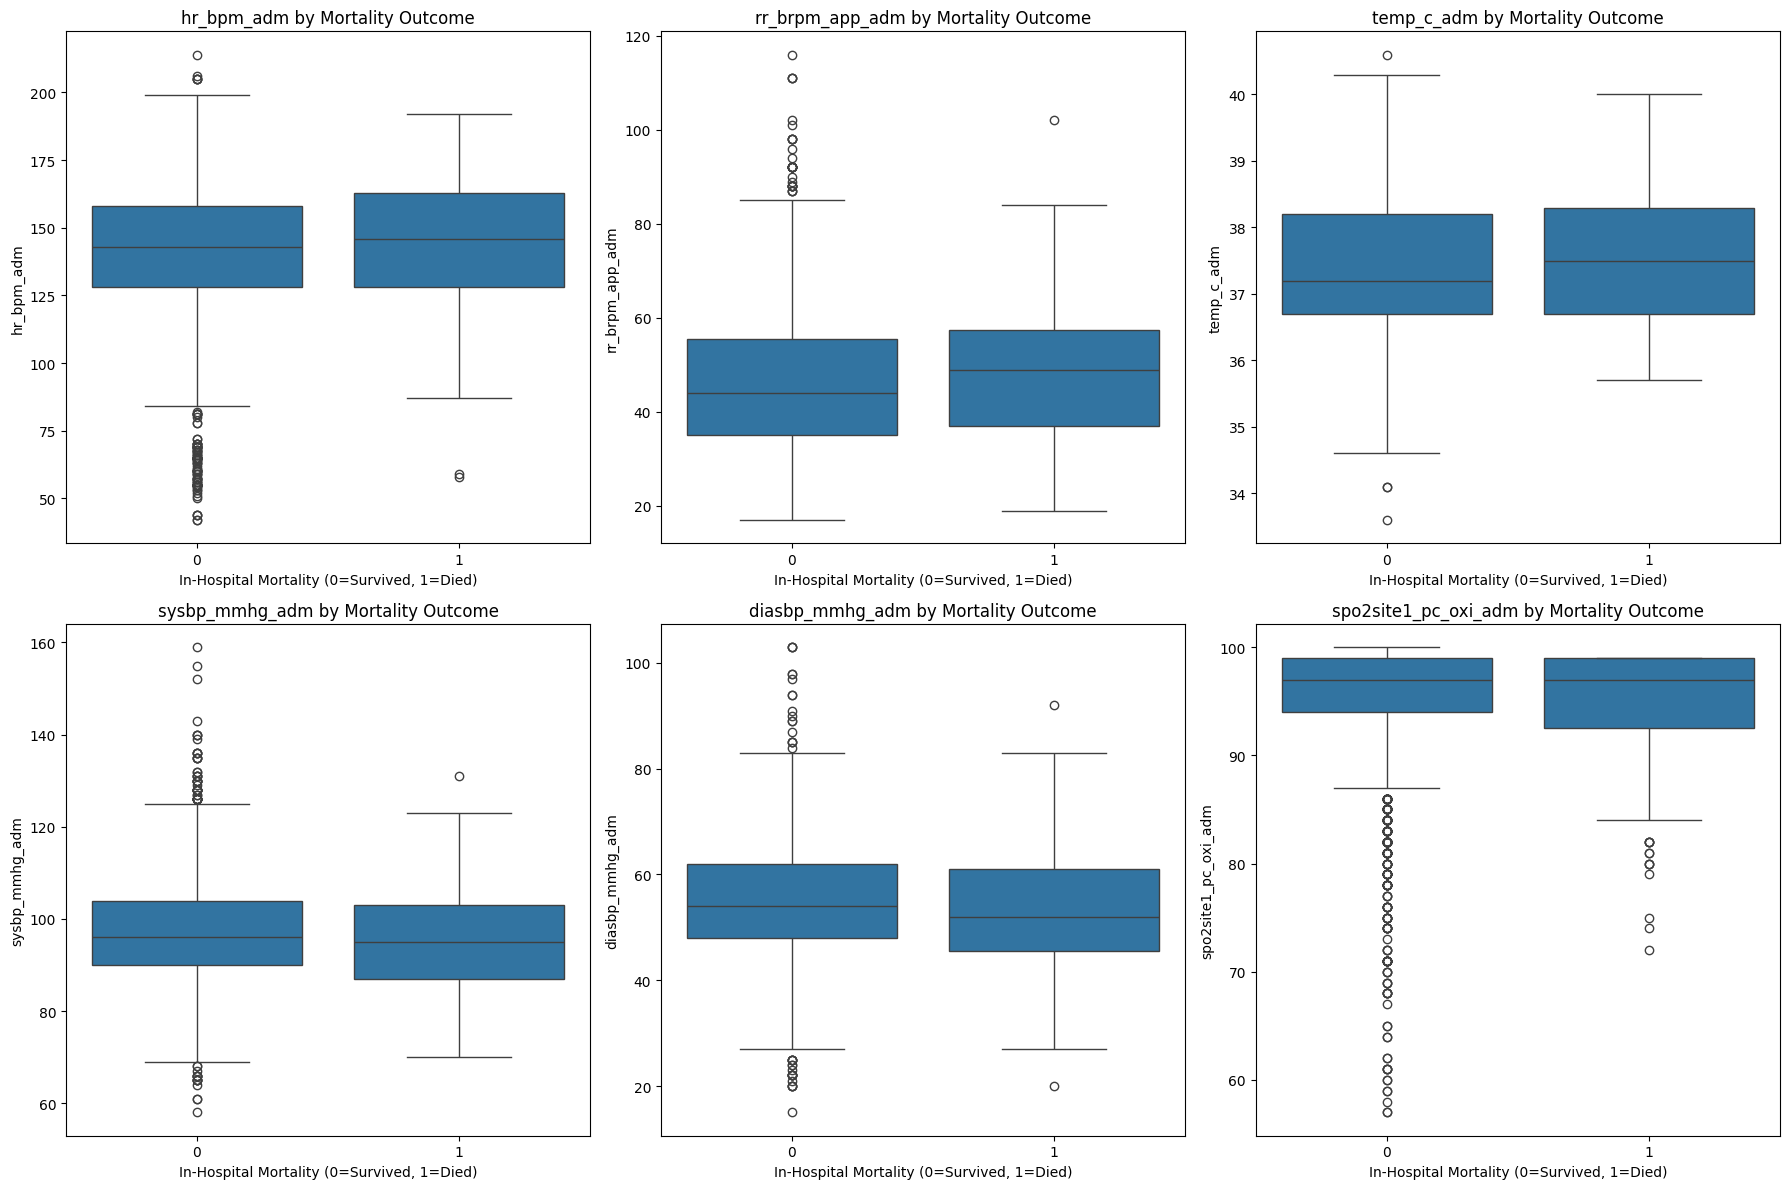

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the features we want to visualize
features_to_plot = [
    'hr_bpm_adm', 
    'rr_brpm_app_adm', 
    'temp_c_adm', 
    'sysbp_mmhg_adm', 
    'diasbp_mmhg_adm', 
    'spo2site1_pc_oxi_adm'
]

# Step 2: Histograms for each feature
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 3: Boxplots for each feature by mortality outcome
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, idx + 1)
    sns.boxplot(x='inhospital_mortality', y=feature, data=df)
    plt.title(f'{feature} by Mortality Outcome')
    plt.xlabel('In-Hospital Mortality (0=Survived, 1=Died)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


#### 1. Histograms (Distribution Overview)
- **Heart Rate (`hr_bpm_adm`)**: Shows a slightly right-skewed distribution with a peak around 140–150 bpm. A few patients had very high heart rates (>200 bpm), suggesting tachycardia among severe cases.
- **Respiratory Rate (`rr_brpm_app_adm`)**: Distribution is right-skewed, with most patients between 40–60 breaths per minute. Some extreme high values are observed.
- **Temperature (`temp_c_adm`)**: The majority of patients cluster between 36–38°C, consistent with normal to febrile temperatures. There is a slight right skew.
- **Systolic BP (`sysbp_mmhg_adm`)**: Appears fairly normally distributed around 95–110 mmHg, but a small number of low values are observed indicating possible hypotension.
- **Diastolic BP (`diasbp_mmhg_adm`)**: Also fairly normally distributed around 50–70 mmHg.
- **Oxygen Saturation (`spo2site1_pc_oxi_adm`)**: Strongly left-skewed towards 100%, but with a noticeable tail for lower values, indicating hypoxia in some patients.

#### 2. Boxplots (Differences by Mortality Outcome)
- **Heart Rate**: Median heart rate is slightly higher in patients who died compared to survivors, but distributions are fairly similar overall.
- **Respiratory Rate**: Deceased patients show a tendency toward higher respiratory rates.
- **Temperature**: Similar distributions between groups, though a slightly wider spread in deceased patients is visible.
- **Systolic and Diastolic BP**: Deceased patients show a lower median systolic and diastolic blood pressure, consistent with septic shock-related hypotension.
- **Oxygen Saturation**: Deceased patients clearly have lower oxygen saturation compared to survivors, highlighting hypoxia as a risk factor.

#### General Observations:
- Outliers are present in almost all measures, particularly for vital signs like heart rate, respiratory rate, and blood pressure.
- Differences between survivors and deceased patients are visible but often subtle, suggesting that mortality is influenced by multiple interacting factors.
- Features like oxygen saturation and blood pressure seem particularly important for distinguishing outcomes and may become strong predictors in modeling.



### step 7: Handling outliers
Outliers are extreme values that can distort statistical summaries and negatively impact machine learning model performance, especially models that are sensitive to scaling or assumptions about data distribution. 

In medical datasets like this one, outliers may arise from rare clinical conditions, measurement errors, or data recording mistakes. 
Therefore, careful handling is essential to maintain the integrity of the data while protecting model robustness.

**Technique Used:**
- We apply **Winsorization** at the **1st and 99th percentiles** for selected continuous clinical features (e.g., heart rate, blood pressure, oxygen saturation).
- Winsorization caps extreme values without completely removing data points, preserving the dataset size while minimizing the influence of outliers.

This approach ensures that our cleaned dataset remains representative and stable for subsequent modeling stages.


In [11]:
# Define the continuous features to handle
features_to_winsorize = [
    'hr_bpm_adm',
    'rr_brpm_app_adm',
    'temp_c_adm',
    'sysbp_mmhg_adm',
    'diasbp_mmhg_adm',
    'spo2site1_pc_oxi_adm'
]

# Apply winsorization at the 1st and 99th percentiles
for feature in features_to_winsorize:
    lower_bound = df[feature].quantile(0.01)
    upper_bound = df[feature].quantile(0.99)
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

print("Outlier handling completed: extreme values have been capped at 1st and 99th percentiles.")


Outlier handling completed: extreme values have been capped at 1st and 99th percentiles.


#### Why Outlier Handling Focused on Selected Features

In this phase of exploratory analysis, we applied outlier handling only to a carefully selected subset of features, specifically:
- `hr_bpm_adm` (Heart rate at admission)
- `rr_brpm_app_adm` (Respiratory rate at admission)
- `temp_c_adm` (Body temperature at admission)
- `sysbp_mmhg_adm` (Systolic blood pressure at admission)
- `diasbp_mmhg_adm` (Diastolic blood pressure at admission)
- `spo2site1_pc_oxi_adm` (Oxygen saturation at admission)

**Justification for Focusing on These Features:**
- These are **vital clinical measures** directly linked to the severity of sepsis and in-hospital mortality.
- These features are **continuous numeric variables**, which are sensitive to the influence of extreme values.
- We had already **visualized these variables** using histograms and boxplots, confirming the presence of potential outliers.
- Addressing outliers in these critical variables improves the robustness and reliability of downstream modeling, without prematurely modifying less critical or categorical features.

By prioritizing outlier handling on key vital signs first, we ensure high data quality for the most impactful predictors while maintaining a systematic and controlled cleaning process.


### Step 8: Encoding Categorical Features
#### Encoding Categorical Features

Machine learning models generally require that all input features be numeric. 
Categorical variables — such as sex, caregiver status, or vaccination history — must therefore be transformed into numerical representations before modeling.

**Why Encoding Is Necessary:**
- **Numerical Representation:** Algorithms like logistic regression, decision trees, and gradient boosting models expect numeric inputs and cannot process text directly.
- **Preserve Information:** Proper encoding ensures that the categorical information is preserved and can meaningfully contribute to model predictions.
- **Avoid Misinterpretation:** Encoding prevents the model from interpreting categories as having a natural order or magnitude when none exists (especially in one-hot encoding).

**Encoding Techniques:**
- **Label Encoding:** For binary categorical variables (e.g., Male/Female), we map categories to 0 and 1.
- **One-Hot Encoding:** For variables with more than two categories (e.g., place of birth), we create new binary columns for each category.

By encoding categorical features correctly, we ensure that the dataset is fully compatible with machine learning models and maintain the predictive power of non-numeric variables.


In [12]:
from sklearn.preprocessing import LabelEncoder

# 1. Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Categorical features to encode: {len(categorical_features)} found")
print(categorical_features)

# 2. Initialize LabelEncoder
label_encoder = LabelEncoder()

# 3. Apply Label Encoding for binary categorical variables
for feature in categorical_features:
    unique_values = df[feature].nunique()
    
    if unique_values == 2:
        # Binary category - apply label encoding
        df[feature] = label_encoder.fit_transform(df[feature])
        print(f"Label encoded feature: {feature}")
    else:
        # Multiclass category - apply one-hot encoding
        df = pd.get_dummies(df, columns=[feature], prefix=[feature])
        print(f"One-hot encoded feature: {feature}")

# 4. Quick confirmation
print(f"Data shape after encoding: {df.shape}")


Categorical features to encode: 85 found
['sex_adm', 'spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'bcseye_adm', 'bcsmotor_adm', 'bcsverbal_adm', 'bcgscar_adm', 'vaccmeasles_adm', 'vaccpneumoc_adm', 'vaccdpt_adm', 'priorweekabx_adm', 'priorweekantimal_adm', 'symptoms_adm___1', 'symptoms_adm___2', 'symptoms_adm___3', 'symptoms_adm___4', 'symptoms_adm___5', 'symptoms_adm___6', 'symptoms_adm___7', 'symptoms_adm___8', 'symptoms_adm___9', 'symptoms_adm___10', 'symptoms_adm___11', 'symptoms_adm___12', 'symptoms_adm___13', 'symptoms_adm___14', 'symptoms_adm___15', 'symptoms_adm___16', 'comorbidity_adm___1', 'comorbidity_adm___2', 'comorbidity_adm___3', 'comorbidity_adm___4', 'comorbidity_adm___5', 'comorbidity_adm___6', 'comorbidity_adm___7', 'comorbidity_adm___8', 'comorbidity_adm___9', 'comorbidity_adm___10', 'comorbidity_adm___11', 'comorbidity_adm___12', 'priorhosp_adm', 'prioryearwheeze_adm', 'prioryearcough_adm', 'diarrheaoften_adm', 'tbcontact_adm', 'feedings

#### Explanation of Feature Increase After Encoding

After applying label encoding and one-hot encoding to categorical features, the total number of columns in the dataset increased significantly.

This is expected because:
- **Label encoding** maps binary categorical variables to a single numeric value (0 or 1) without changing the number of columns.
- **One-hot encoding** creates a new binary column for each unique category in a multiclass categorical variable.
  - For example, a feature with 5 unique categories would produce 5 new binary columns.
  - Repeating this process across multiple categorical features leads to a large expansion in the total number of features.

**Current Shape:**
- **Rows:** 2,686 patients
- **Columns:** 220 features

At this stage, **we retain all columns intentionally** to preserve all potentially informative features. 
Feature selection will be performed later during the modeling phase based on importance, relevance, and model performance metrics.

Thus, the increase in feature count is a natural outcome of preparing the dataset for machine learning models and ensures no early loss of predictive information.
